In [16]:
%matplotlib inline
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import mglearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [12]:
boston = load_boston()
X, y = mglearn.datasets.load_extended_boston()

In [8]:
print("Shape: \n{}".format(boston.data.shape))
print("Shape: \n{}".format(X.data.shape))

Shape: 
(506, 13)
Shape: 
(506, 104)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
print("Training: {:.2f} and Test: {:.2f}".format(lr.score(X_train,y_train),lr.score(X_test,y_test)))

Training: 0.95 and Test: 0.61


In [20]:
from sklearn.linear_model import Ridge
ri = Ridge().fit(X_train, y_train)
print("Training: {:.2f} and Test: {:.2f}".format(ri.score(X_train,y_train),ri.score(X_test,y_test)))

Training: 0.89 and Test: 0.75


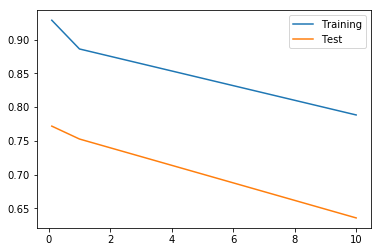

In [33]:
train_acc = []
test_acc = []
coef_arr = []
alp_set = [0.1,1,10]


for i in alp_set:
    ri = Ridge(alpha=i).fit(X_train,y_train)
    train_acc.append(ri.score(X_train, y_train))
    test_acc.append(ri.score(X_test, y_test))
    coef_arr.append(ri.coef_)

plt.plot(alp_set,train_acc,label="Training")
plt.plot(alp_set,test_acc,label="Test")

plt.legend()

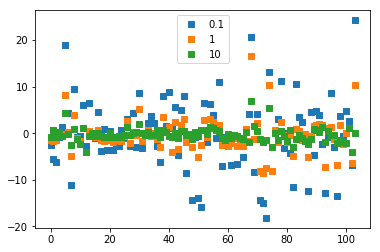

In [43]:
j=0
for i in coef_arr:
    plt.plot(i,'s', label = "{}".format(alp_set[j]))
    j +=1
plt.legend()

In [46]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training: {:.2f} and Test {:.2f} and number of features: {}".format(lasso.score(X_train,y_train),lasso.score(X_test,y_test), np.sum(lasso.coef_ != 0)))

Training: 0.29 and Test 0.21 and number of features: 4


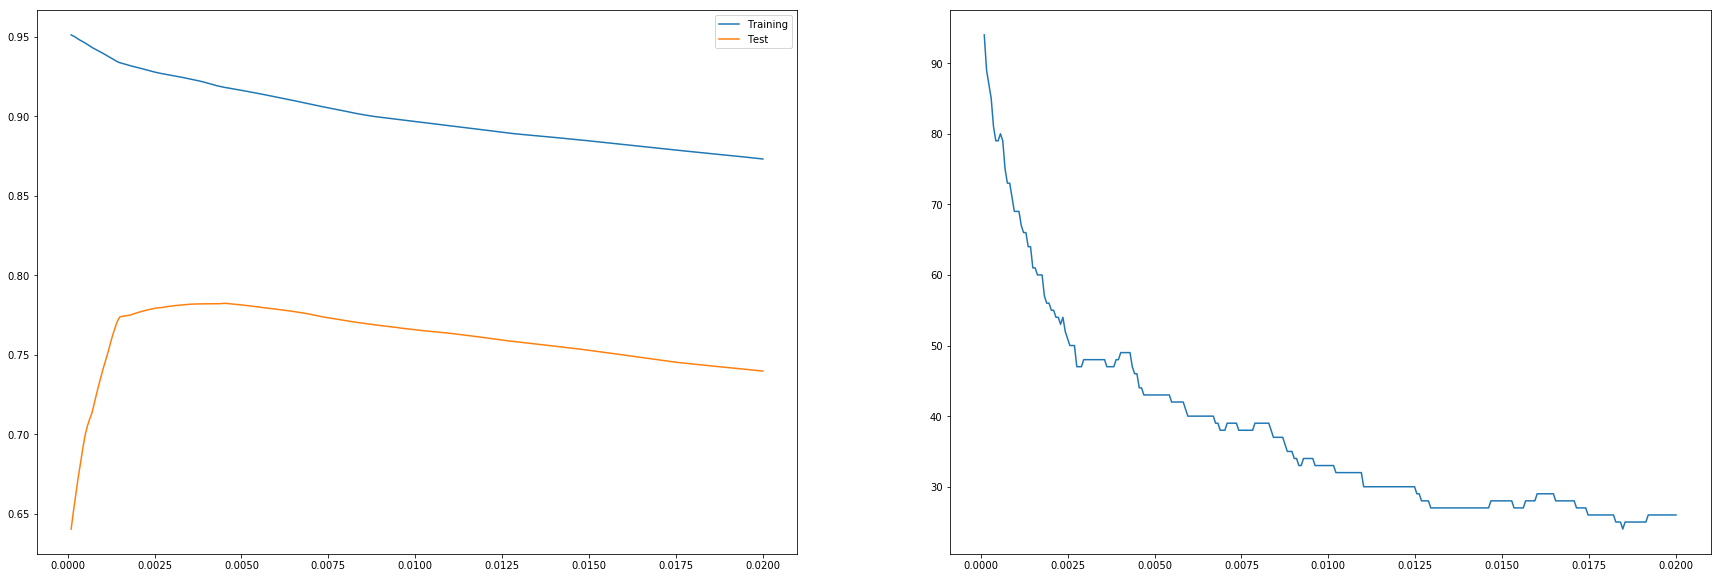

In [67]:
train_acc = []
test_acc = []
feat_number = []
alp_set = np.linspace(0.0001,0.02,300) #long calculation time

fig, axes = plt.subplots(1,2,figsize=(30,10))
for i in alp_set:
    lasso = Lasso(alpha=i, max_iter=100000).fit(X_train,y_train)
    train_acc.append(lasso.score(X_train,y_train))
    test_acc.append(lasso.score(X_test,y_test))
    feat_number.append(np.sum(lasso.coef_ != 0))

axes[0].plot(alp_set,train_acc, label = "Training")
axes[0].plot(alp_set,test_acc,label = "Test")
axes[0].legend()

axes[1].plot(alp_set,feat_number) #like poetry